In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_imdb_data.csv', encoding = 'ISO-8859-1')
df.head()

,Title,Release,Certificate,Runtime,Genre,Rating,Metascore,Summary,Votes,Gross,Director1,Director2,Actor1,Actor2,Actor3,Actor4,Genre1,Genre2,Genre3,Years since Release
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,2387974,28.34,Frank Darabont,NaN,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Drama,NaN,NaN,27
1,The Godfather,1972,A,175,Crime Drama,9.2,100.0,An organized crime dynasty's aging patriarch t...,1654814,134.97,Francis Ford Coppola,NaN,Marlon Brando,Al Pacino,James Caan,Diane Keaton,Crime,Drama,NaN,49
2,The Dark Knight,2008,UA,152,Action Crime Drama,9.0,84.0,When the menace known as the Joker wreaks havo...,2350710,534.86,Christopher Nolan,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,13
3,The Godfather: Part II,1974,A,202,Crime Drama,9.0,90.0,The early life and career of Vito Corleone in ...,1150837,57.30,Francis Ford Coppola,NaN,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,Crime,Drama,NaN,47
4,12 Angry Men,1957,U,96,Crime Drama,9.0,96.0,A jury holdout attempts to prevent a miscarria...,704553,4.36,Sidney Lumet,NaN,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,Crime,Drama,NaN,64


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1500 non-null   object 
 1   Release              1500 non-null   int64  
 2   Certificate          1199 non-null   object 
 3   Runtime              1500 non-null   int64  
 4   Genre                1500 non-null   object 
 5   Rating               1500 non-null   float64
 6   Metascore            1322 non-null   float64
 7   Summary              1500 non-null   object 
 8   Votes                1500 non-null   int64  
 9   Gross                1242 non-null   float64
 10  Director1            1500 non-null   object 
 11  Director2            141 non-null    object 
 12  Actor1               1499 non-null   object 
 13  Actor2               1499 non-null   object 
 14  Actor3               1499 non-null   object 
 15  Actor4               1498 non-null   o

In [122]:
df.describe()

,Release,Runtime,Rating,Metascore,Votes,Gross,Years since Release
count,1500.000000,1500.000000,1500.000000,1322.000000,1.500000e+03,1242.000000,1500.000000
mean,1989.202000,118.046667,7.683000,74.183812,2.202363e+05,68.960918,31.798000
std,24.757851,25.112273,0.332011,12.996603,2.936399e+05,102.175036,24.757851
min,1916.000000,45.000000,7.300000,27.000000,1.003600e+04,0.000000,0.000000
25%,1973.000000,101.000000,7.400000,66.000000,3.228625e+04,8.095000,12.000000
50%,1996.000000,115.000000,7.600000,75.000000,1.044950e+05,31.705000,25.000000
75%,2009.000000,130.000000,7.900000,84.000000,2.880432e+05,83.690000,48.000000
max,2021.000000,288.000000,9.300000,100.000000,2.387974e+06,936.660000,105.000000


In [123]:
sns.set_style('darkgrid')

### Missing Values

In [145]:
mis_val = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([mis_val,percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
Director2,1359,0.906000
Genre3,522,0.348000
Certificate,301,0.200667
Gross,258,0.172000
Metascore,178,0.118667
Genre2,143,0.095333
Actor4,2,0.001333
Actor3,1,0.000667
Actor2,1,0.000667
Actor1,1,0.000667


### Distribution of numeric variables

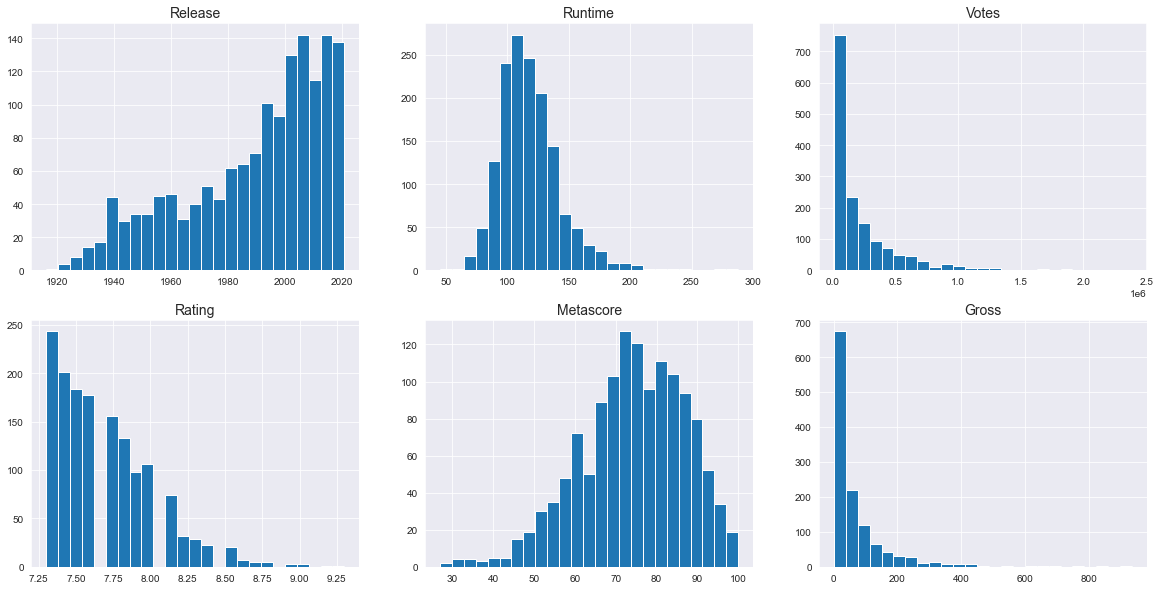

In [159]:
fig,ax = plt.subplots(2,3,figsize=(20,10))

ax[0,0].hist(df['Release'],bins=25)
ax[0,0].set_title('Release', fontsize = 14)

ax[0,1].hist(df.Runtime,bins=25)
ax[0,1].set_title('Runtime', fontsize = 14)

ax[1,0].hist(df.Rating, bins=25)
ax[1,0].set_title('Rating',fontsize = 14)

ax[1,1].hist(df.Metascore, bins=25)
ax[1,1].set_title('Metascore', fontsize = 14)

ax[0,2].hist(df.Votes, bins=25)
ax[0,2].set_title('Votes', fontsize = 14)

ax[1,2].hist(df.Gross, bins=25)
ax[1,2].set_title('Gross', fontsize = 14)

plt.show()

### Heatmap

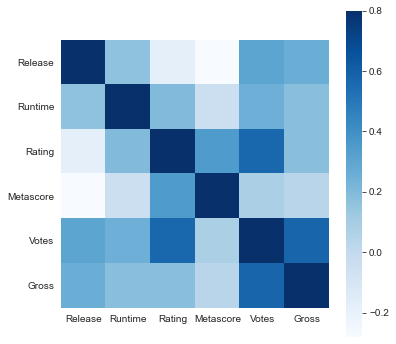

In [263]:
corrmat = df[['Release','Runtime','Rating','Metascore','Votes', 'Gross']].corr()

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, cmap='Blues', linewidth=0, vmax=0.8, square = True)
plt.show()

### Pie chart based on certifciate

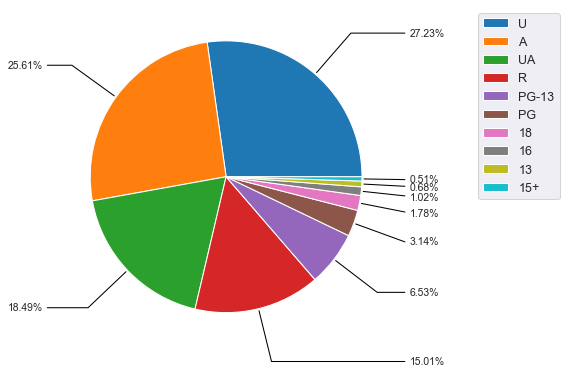

In [218]:
cer = df.Certificate.value_counts().nlargest(10)
cer_sum = cer.values.sum()
cer_per = []
for i in cer.values:
    p = (i/cer_sum)*100
    cer_per.append(p)
cer_per = np.around(cer_per,2)

fig, ax = plt.subplots(figsize=(6,6),dpi=75)

wedges, texts = ax.pie(cer_per)

kw = dict(arrowprops=dict(arrowstyle="-", color='black'), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(cer_per[i])+'%', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
    
plt.legend( labels=cer.index, bbox_to_anchor = (1.5,1),fontsize = 'large')
plt.show()

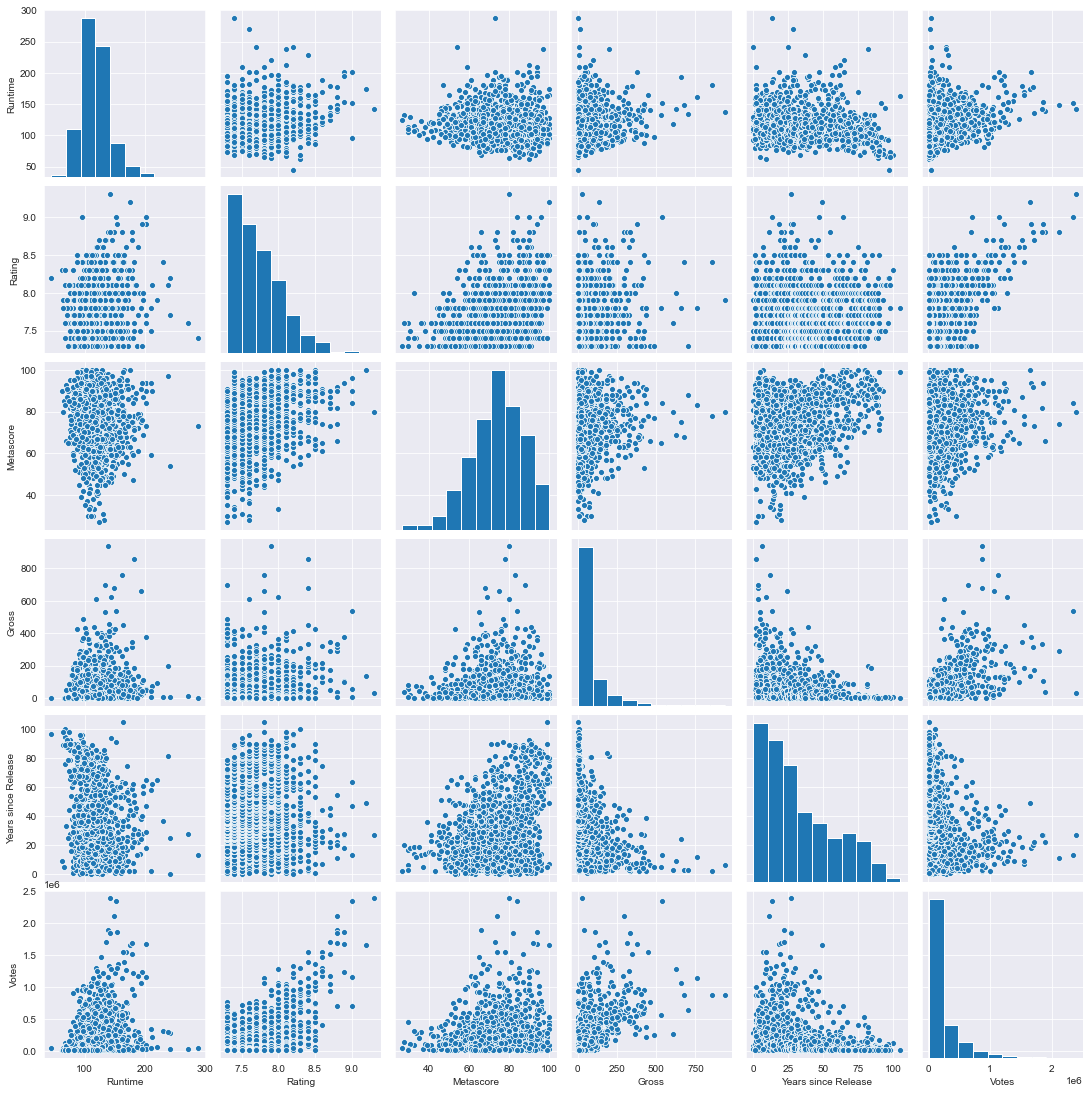

In [232]:
# Pair plot to see correlation between the numerical variables
p_df = df[['Runtime','Rating', 'Metascore', 'Gross', 'Years since Release', 'Votes']]
sns.pairplot(p_df)

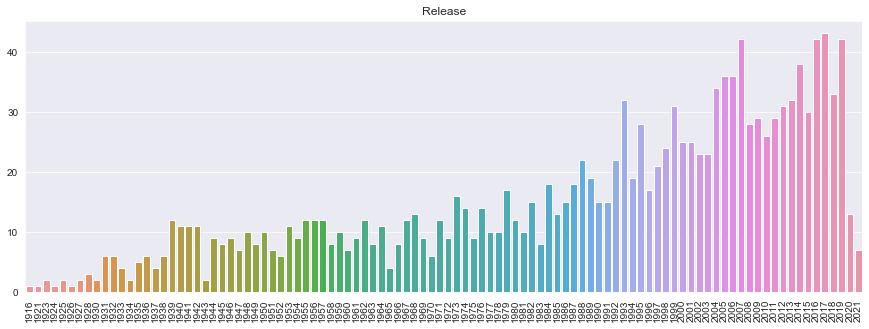

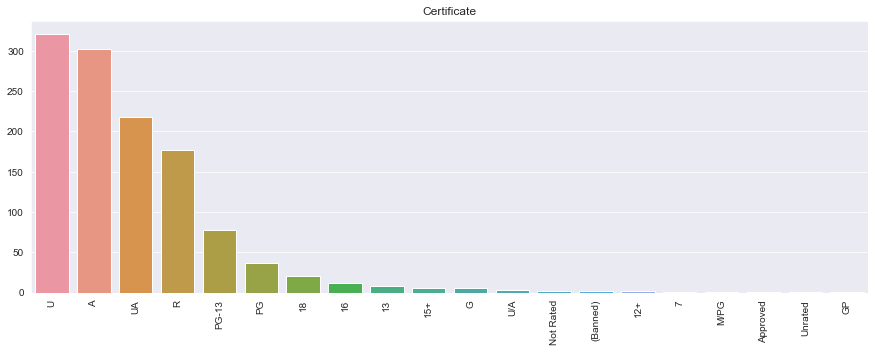

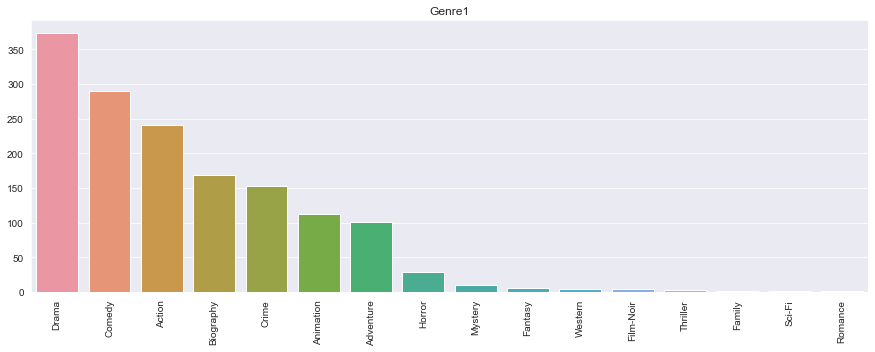

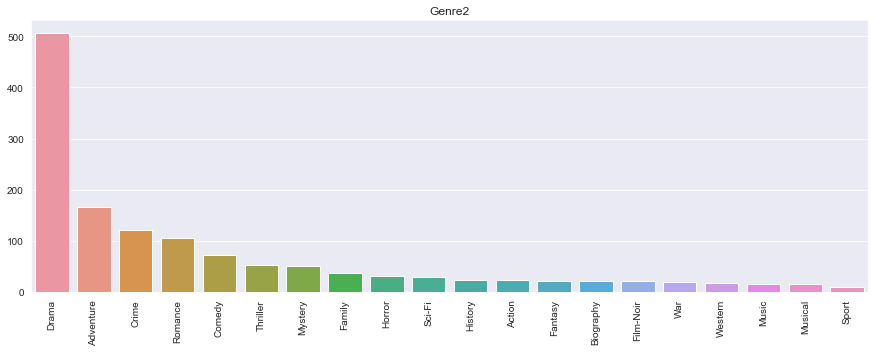

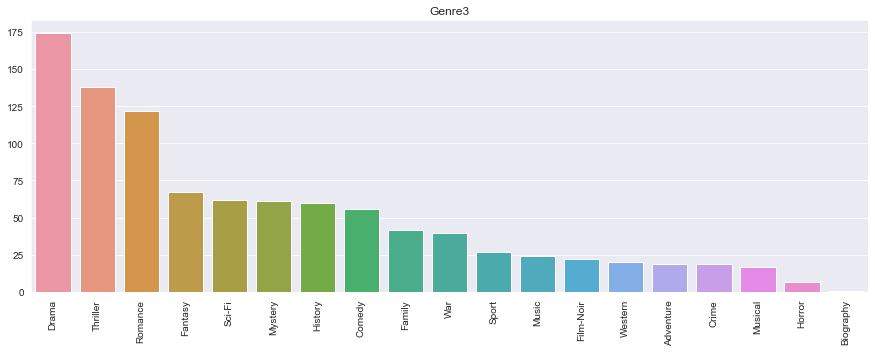

In [357]:
df_cat = df[['Release', 'Certificate', 'Genre1', 'Genre2', 'Genre3']]

for col in df_cat.columns:
    plt.figure(figsize=(15,5))
    c = df[col].value_counts()
    gph = sns.barplot(x = c.index, y = c.values)
    gph.set_xticklabels(gph.get_xticklabels(), rotation = 90)
    plt.title(col)
    plt.show()

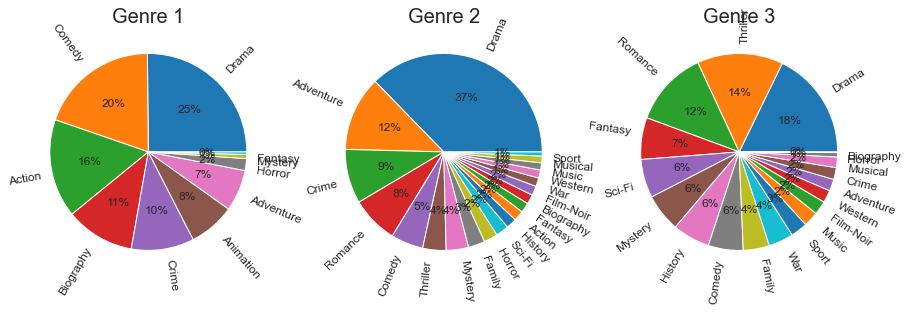

In [358]:
fig,ax = plt.subplots(1,3, figsize=(15,21))

ax[0].pie(df.Genre1.value_counts().nlargest(10), autopct='%1.0f%%',labels = df.Genre1.value_counts().nlargest(10).index, 
          textprops={'fontsize': 12}, rotatelabels=True)
ax[0].set_title('Genre 1',fontsize=20)
ax[1].pie(df.Genre2.value_counts(), autopct='%1.0f%%',labels = df.Genre2.value_counts().index, textprops={'fontsize': 12}
         , rotatelabels=True)
ax[1].set_title('Genre 2',fontsize=20)
ax[2].pie(df.Genre3.value_counts(), autopct='%1.0f%%',labels = df.Genre3.value_counts().index, textprops={'fontsize': 12}
         , rotatelabels=True)
ax[2].set_title('Genre 3', fontsize=20)
plt.show()

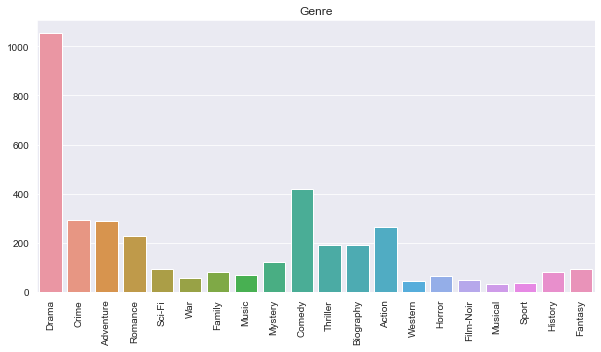

In [327]:
# Catogorised by Genre
genres = ['Drama', 'Crime', 'Adventure', 'Romance', 'Sci-Fi', 'War','Family', 'Music', 'Mystery', 'Comedy', 'Thriller',
          'Biography','Action', 'Western', 'Horror', 'Film-Noir', 'Musical', 'Sport','History', 'Fantasy']

values = []
for genre in genres:
    gen = df['Genre'].str.contains(genre).fillna(False)
    values.append(len(df[gen]))
fix,ax = plt.subplots(figsize=(10,5))   
gph = sns.barplot(x=genres, y=values)
gph.set_xticklabels(gph.get_xticklabels(), rotation = 90)
plt.title('Genre')
plt.show()

In [ ]:
years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for genre in genres:
    gen = df['Genre'].str.contains(genre).fillna(False)
    fix,ax = plt.subplots(figsize=(15,4))   
    gph = sns.countplot(x='Release', data=df[df['Release']>2010][gen], palette="Greens_d")
    gph.set_xticklabels(gph.get_xticklabels(), rotation = 90)
    plt.title(genre)

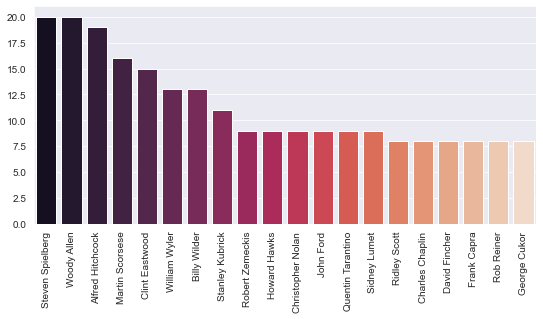

In [373]:
#Top Directors
top_direct = df.Director1.value_counts().nlargest(20)
plt.figure(figsize=(9,4))
gph = sns.barplot(x=top_direct.index, y=top_direct.values, palette = 'rocket')
gph.set_xticklabels(gph.get_xticklabels(), rotation=90)
plt.show()

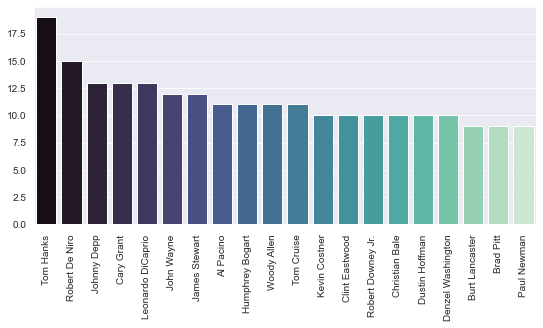

In [354]:
#Top Actors
top_actor = df.Actor1.value_counts().nlargest(20)
plt.figure(figsize=(9,4))
gph = sns.barplot(x=top_actor.index, y=top_actor.values, palette = 'mako')
gph.set_xticklabels(gph.get_xticklabels(), rotation=90)
plt.show()

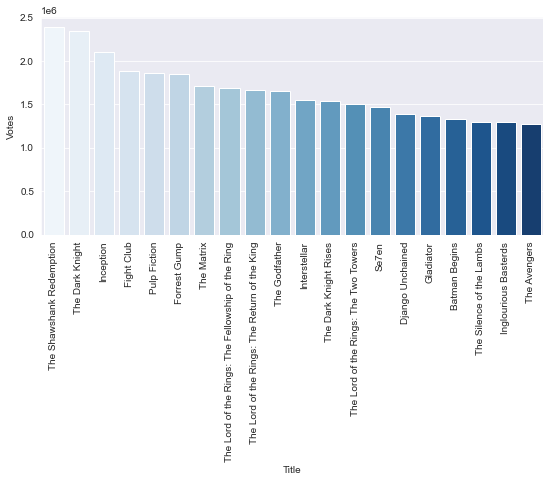

In [376]:
# Movies with most votes
top_votes = df.sort_values('Votes',ascending=False).head(20)
plt.figure(figsize=(9,4))
gph = sns.barplot(x=top_votes.Title, y=top_votes.Votes, palette = 'Blues')
gph.set_xticklabels(gph.get_xticklabels(), rotation=90)
plt.show()